# Final Project

Team 5: Mathia Quimpo, Matthew Chin

## Data Cleaning and Exploration

In [171]:
## Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

In [172]:
## Load Data
raw_df = pd.read_csv('https://github.com/mchin10/BSAN-6070/blob/main/Final%20Project/climate_change_data.csv?raw=true')
raw_df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,00:00.0,New Williamtown,Latvia,10.688986,403.118902,0.717506,13.835237,23.631256,18.492026
1,09:43.3,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,19:26.5,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,29:09.8,South David,Vietnam,12.309581,422.404984,-0.475931,5.193341,47.467938,8.554563
4,38:53.0,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [173]:
## Data Inspection
print(raw_df.info())
print(raw_df.isnull().sum())
print(raw_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.3+ KB
None
Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64
0


In [174]:
# One-hot encoding for 'Country' column
oh_encoder = OneHotEncoder()
oe_encoded_countries = oh_encoder.fit_transform(raw_df[['Country']])
encoded_columns = oh_encoder.get_feature_names_out()
ohe_df = pd.DataFrame(oe_encoded_countries.toarray(), columns=encoded_columns)

# Drop unnecessary columns and merge DataFrames
df = pd.concat([raw_df.drop(['Date', 'Location', 'Country'], axis=1), ohe_df], axis=1)
df

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,10.688986,403.118902,0.717506,13.835237,23.631256,18.492026,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.309581,422.404984,-0.475931,5.193341,47.467938,8.554563,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


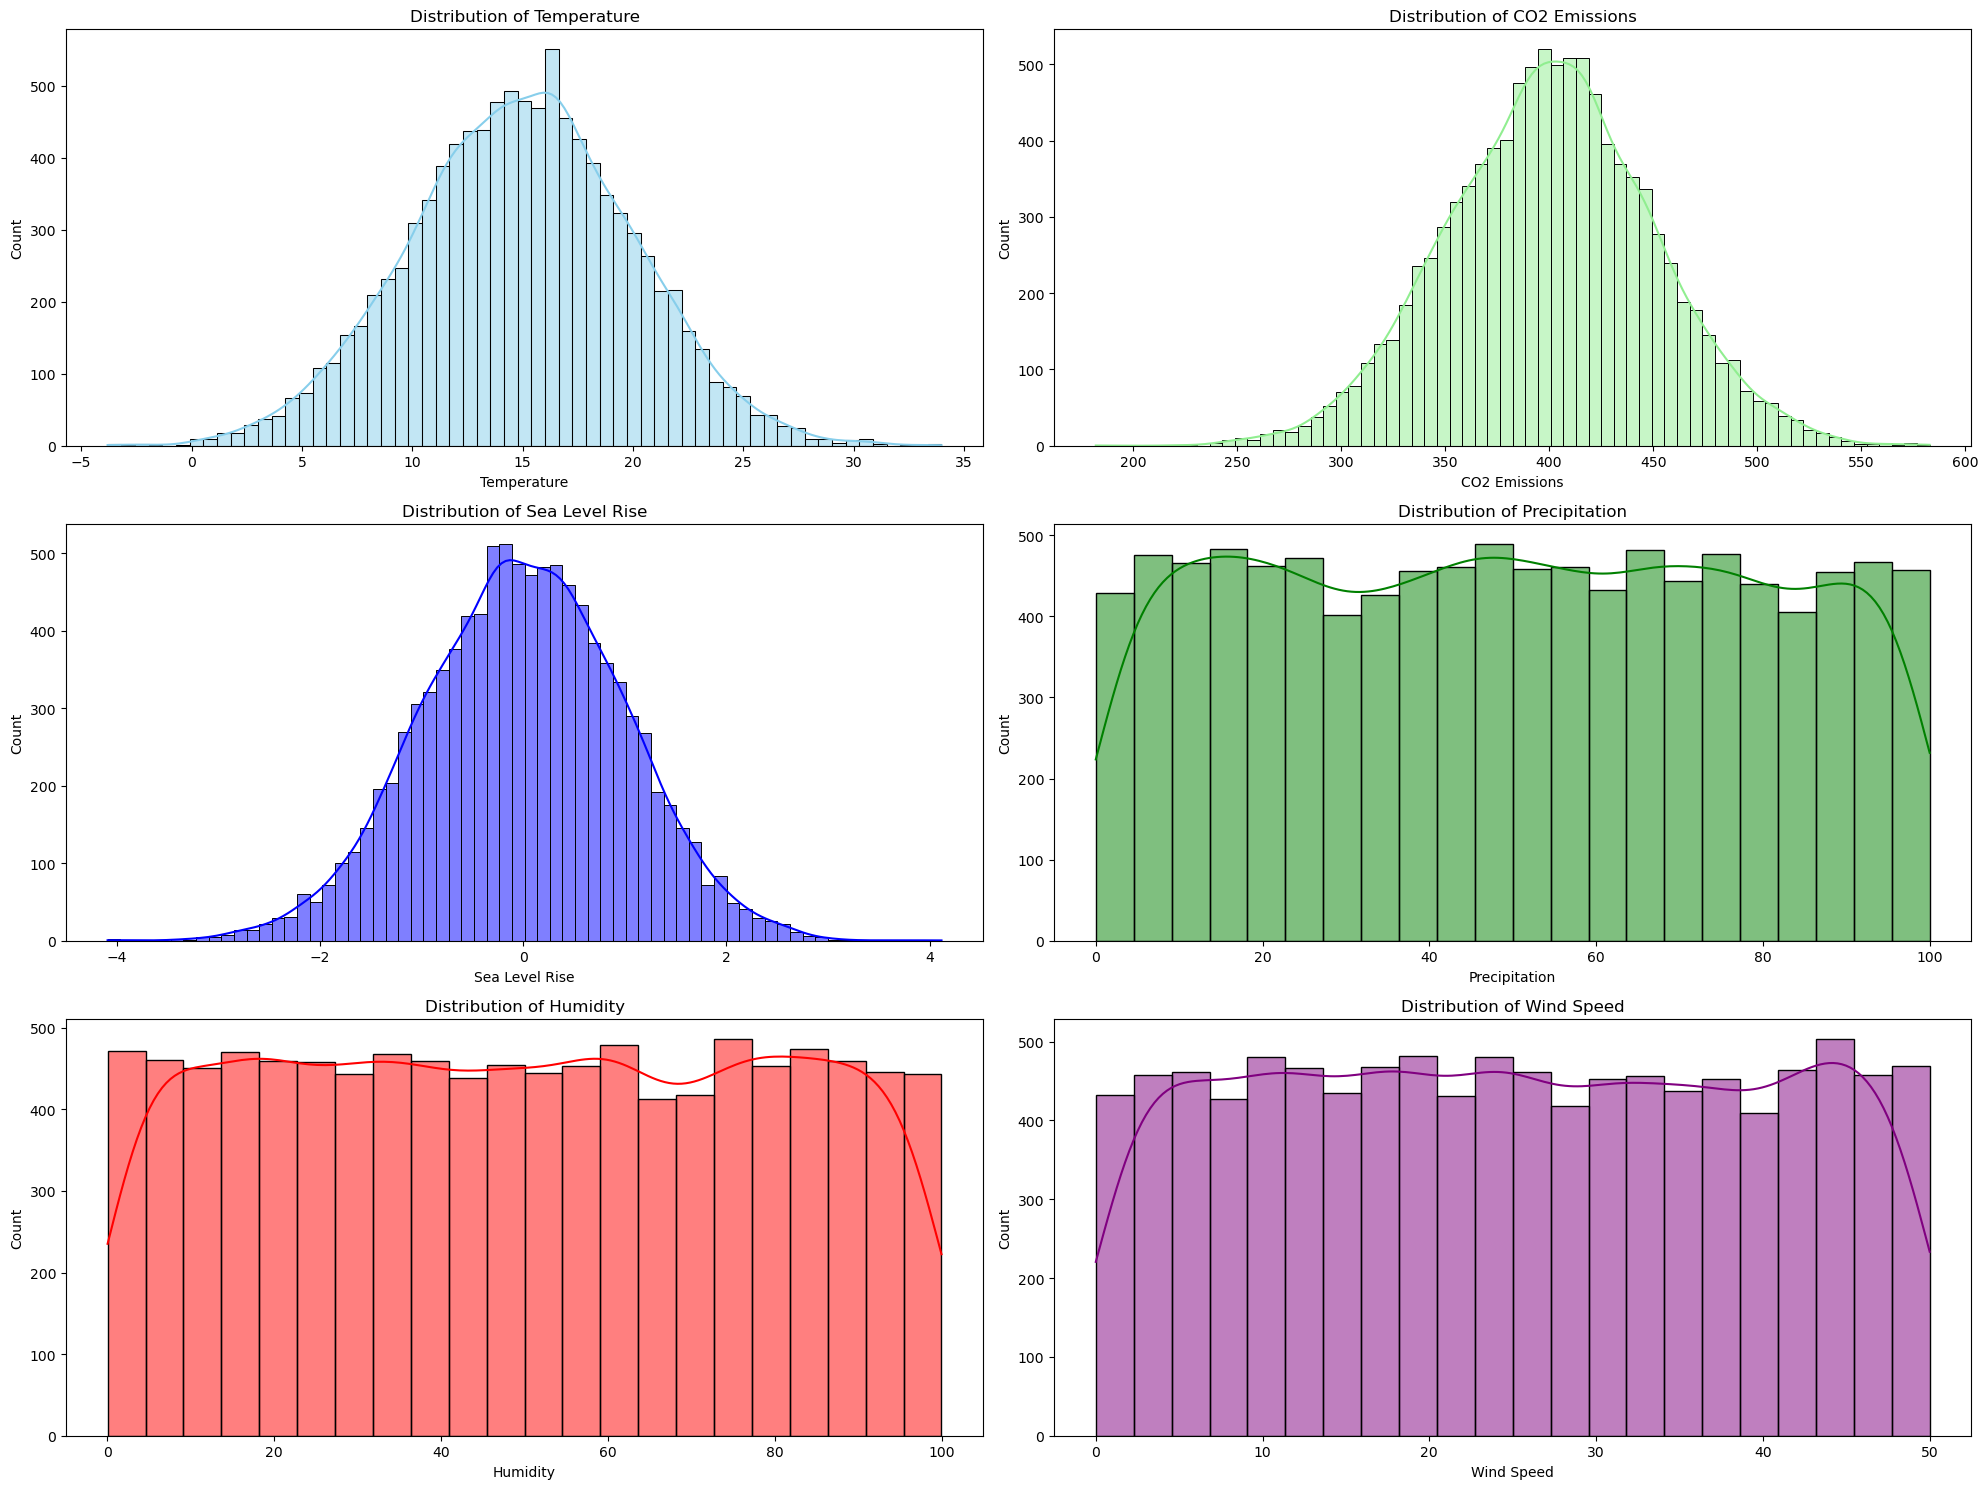

In [175]:
## Data Exploration
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
variables = ['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']
colors = ['skyblue', 'lightgreen', 'blue', 'green', 'red', 'purple']
for i, var in enumerate(variables):
    sns.histplot(df[var], ax=axes[i//2, i%2], color=colors[i], kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

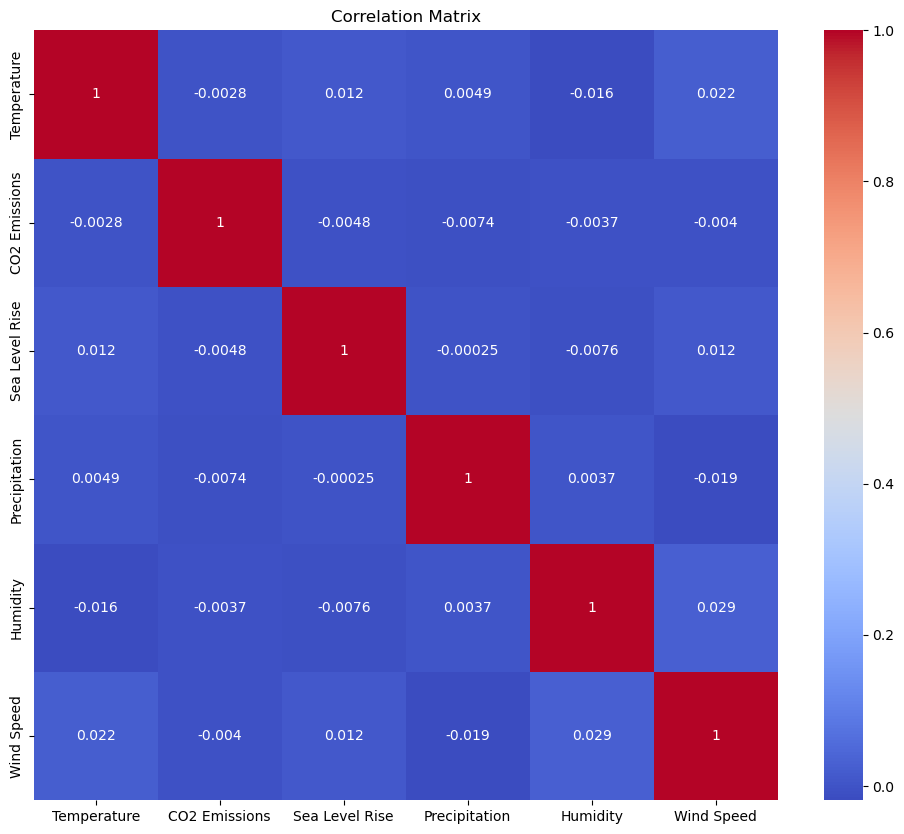

In [176]:
# Assume other columns such as 'Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'
non_country_columns = [col for col in df.columns if col not in encoded_columns]
# Compute the correlation matrix for non-country columns
correlation_matrix = df[non_country_columns].corr()

# Generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/Users/mayi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


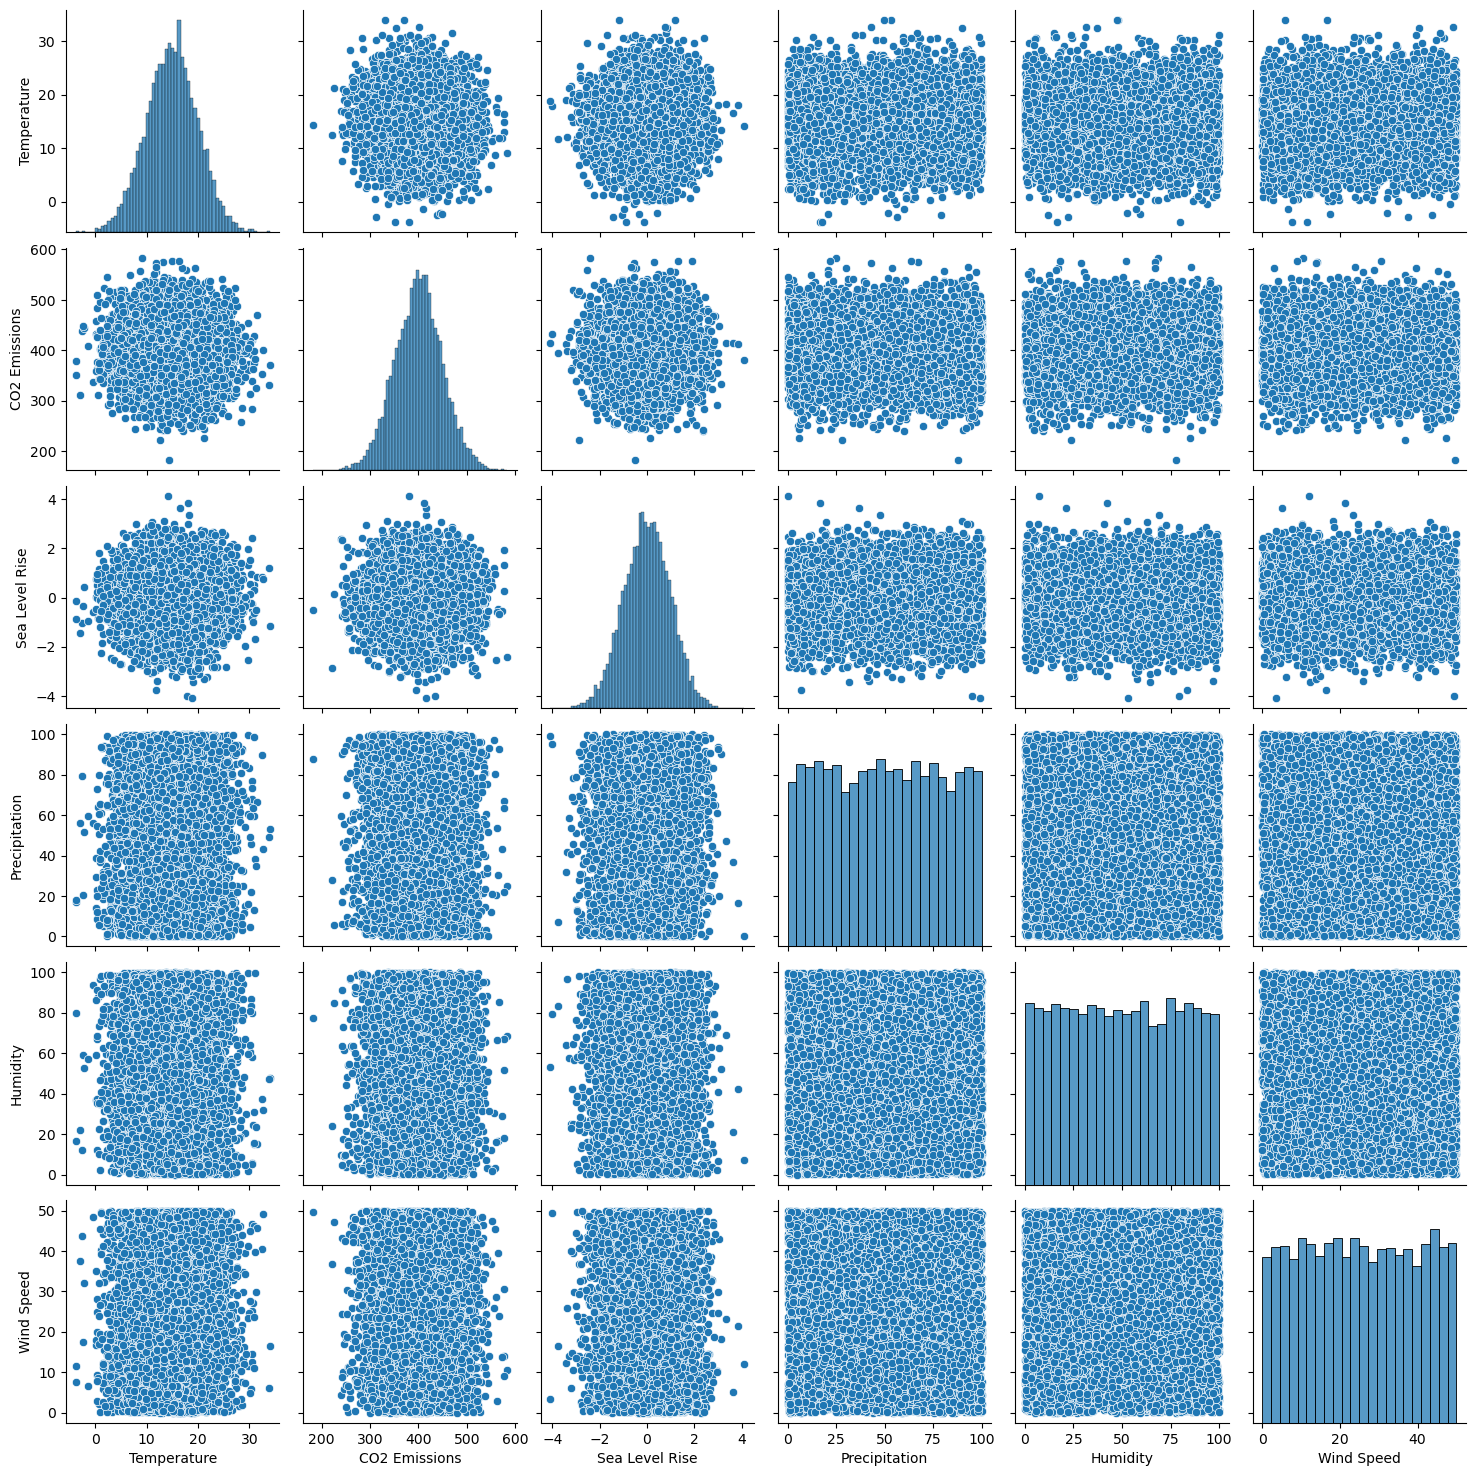

In [177]:
sns.pairplot(raw_df)

## Model Development and Tuning

In [178]:
## Model Development and Tuning
X = df.drop('CO2 Emissions', axis=1)
y = df['CO2 Emissions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

In [179]:
# Parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [180]:
# Perform grid search
random_search = RandomizedSearchCV(rf, param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Assign the best estimator to final_rf
final_rf = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/mayi/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mayi/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mayi/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/mayi/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Users/mayi

In [181]:
# Evaluate the model
predictions = final_rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 2424.5511568260154
R2 Score: 0.0009909839678108323
Mean Absolute Error: 38.86470253069148


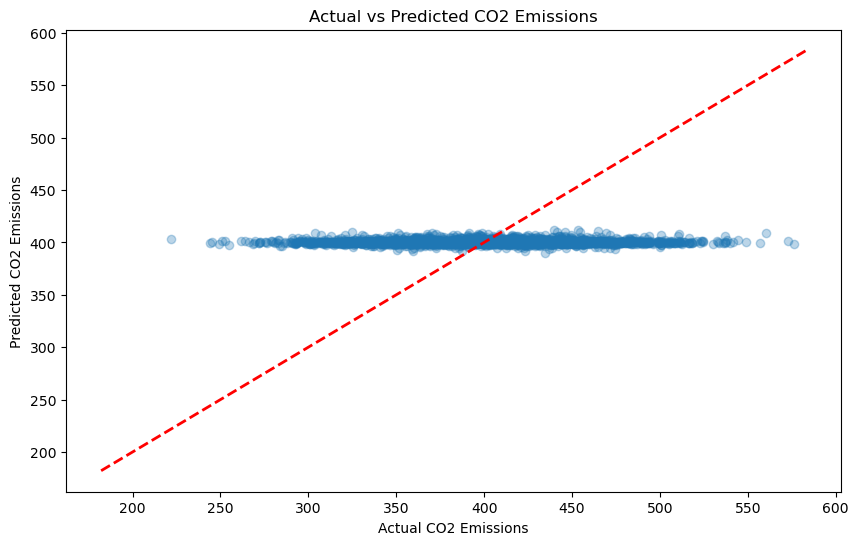

In [182]:
## Visualizing Model Performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()

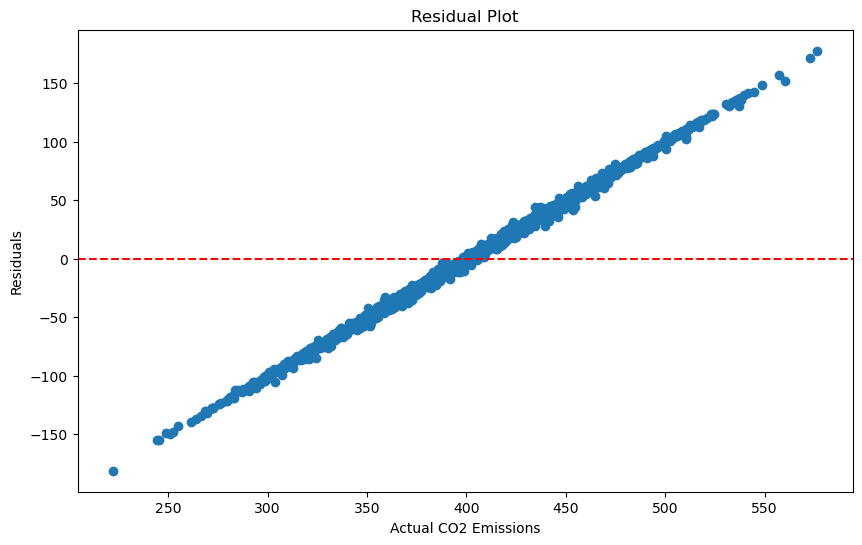

In [183]:
## Model Diagnostics: Residual Plot
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Prediction with New Data

In [184]:
def predict_new_data():
    new_data = {
        'Country': input("Enter Country: "),
        'Temperature': float(input("Enter Temperature: ")),
        'Sea Level Rise': float(input("Enter Sea Level Rise: ")),
        'Precipitation': float(input("Enter Precipitation: ")),
        'Humidity': float(input("Enter Humidity: ")),
        'Wind Speed': float(input("Enter Wind Speed: ")),
    }

    new_df = pd.DataFrame([new_data])
    new_df_encoded = pd.get_dummies(new_df[['Country']], prefix='Country')
    new_df_encoded = new_df_encoded.reindex(columns=encoded_columns, fill_value=0)
    final_df = pd.concat([new_df.drop(columns=['Country']), new_df_encoded], axis=1)
    prediction = final_rf.predict(final_df)
    print("Predicted CO2 Emissions:", prediction[0])

# Function call to predict new data
predict_new_data()

Enter Country: Belgium
Enter Temperature: 4.45
Enter Sea Level Rise: 2.15
Enter Precipitation: 20.77
Enter Humidity: 11.91
Enter Wind Speed: 55.78
Predicted CO2 Emissions: 397.9951778462013
